In [53]:
import pandas as pd
import random
from datetime import datetime, timedelta
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Enhanced realistic values for each column
agencies = ['NASA', 'ESA', 'Roscosmos', 'SpaceX', 'ISRO', 'CNSA', 'JAXA']
mission_types = ['Manned', 'Unmanned', 'Satellite Launch', 'Rover Deployment', 'Deep Space Exploration']
objectives = ['Exploration', 'Communication', 'Research', 'Transportation']
outcomes = ['Success', 'Failure', 'Partial Success']
challenges = ['Propulsion failure', 'Communication breakdown', 'Heat shield damage', 'Fuel leak', 'Power failure']
failure_reasons = ['Fuel Leak', 'System Overload', 'Propulsion Malfunction', 'None']
technologies = ['Falcon 9', 'Saturn V Rocket', 'Soyuz Rocket', 'Ariane 5', 'PSLV', 'Long March 5']
collaborations = ['None', 'NASA', 'ESA', 'Roscosmos', 'ISRO']
environments = ['None', 'Extreme Cold', 'Radiation Threat', 'Dust Storm', 'Solar Flares']

# Mission budgets based on mission type (in millions USD)
mission_budget = {
    'Manned': (500, 2000),
    'Unmanned': (100, 500),
    'Satellite Launch': (50, 300),
    'Rover Deployment': (200, 1000),
    'Deep Space Exploration': (700, 3000)
}

# Function to generate random launch dates
def random_date(start, end):
    return start + timedelta(days=random.randint(0, (end - start).days))

# Create empty list to store mission data
data = []

# Generate 150 realistic missions
for i in range(150):
    mission_id = f'Mission_{i+1:03d}'
    agency = random.choice(agencies)
    mission_name = f'{random.choice(["Apollo", "Mars Rover", "Lunar", "Viking", "Starship"])} {random.randint(1, 20)}'
    mission_type = random.choice(mission_types)
    launch_date = random_date(datetime(1960, 1, 1), datetime(2024, 12, 31)).strftime('%Y-%m-%d')
    duration = random.randint(1, 7000) if mission_type != 'Satellite Launch' else random.randint(365, 10000)
    outcome = random.choices(outcomes, weights=[0.7, 0.2, 0.1], k=1)[0]  # Higher success rate
    objective = random.choice(objectives)
    challenge = random.choice(challenges)
    budget_range = mission_budget[mission_type]
    budget = random.randint(budget_range[0], budget_range[1])  # Mission budget based on mission type
    failure_reason = random.choice(failure_reasons) if outcome == 'Failure' else 'None'
    technology = random.choice(technologies)
    collaboration = random.choice(collaborations)
    environment = random.choice(environments)
    risk = random.choice(['Low', 'Medium', 'High']) if outcome != 'Success' else 'Low'
    
    # Append mission data to the list
    data.append([mission_id, agency, mission_name, mission_type, launch_date, duration, outcome, objective, challenge, budget, failure_reason, technology, collaboration, environment, risk])

# Convert the data into a pandas DataFrame
df = pd.DataFrame(data, columns=['Mission ID', 'Agency Name', 'Mission Name', 'Mission Type', 'Launch Date', 'Duration (days)', 'Outcome', 'Objective', 'Challenges Faced', 'Budget (USD millions)', 'Failure Reason', 'Technology Used', 'Collaborating Agencies', 'Environmental Conditions', 'Risk Level'])
df



,Mission ID,Agency Name,Mission Name,Mission Type,Launch Date,Duration (days),Outcome,Objective,Challenges Faced,Budget (USD millions),Failure Reason,Technology Used,Collaborating Agencies,Environmental Conditions,Risk Level
0,Mission_001,Roscosmos,Apollo 4,Manned,2013-12-27,1683,Success,Communication,Communication breakdown,1873,None,Soyuz Rocket,None,None,Low
1,Mission_002,ESA,Lunar 19,Satellite Launch,1991-08-06,2995,Failure,Communication,Power failure,195,Fuel Leak,Falcon 9,ISRO,None,High
2,Mission_003,ESA,Mars Rover 10,Unmanned,2008-03-09,36,Partial Success,Exploration,Communication breakdown,358,None,Long March 5,Roscosmos,Radiation Threat,High
3,Mission_004,ISRO,Mars Rover 15,Manned,1976-03-23,6839,Success,Transportation,Fuel leak,938,None,PSLV,NASA,Dust Storm,Low
4,Mission_005,NASA,Lunar 4,Rover Deployment,1969-11-23,4258,Success,Research,Heat shield damage,770,None,Long March 5,None,None,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,Mission_146,Roscosmos,Lunar 13,Rover Deployment,2012-01-11,6208,Success,Transportation,Power failure,979,None,Saturn V Rocket,Roscosmos,Extreme Cold,Low
146,Mission_147,ESA,Mars Rover 16,Unmanned,2006-04-11,4809,Failure,Transportation,Fuel leak,274,Fuel Leak,Soyuz Rocket,NASA,Dust Storm,High
147,Mission_148,SpaceX,Mars Rover 15,Rover Deployment,2010-02-06,247,Success,Communication,Heat shield damage,955,None,Falcon 9,Roscosmos,Radiation Threat,Low
148,Mission_149,Roscosmos,Mars Rover 14,Rover Deployment,2021-07-10,6166,Success,Research,Heat shield damage,801,None,Falcon 9,ISRO,None,Low


In [54]:
total_missions = df
successful_missions = df[df['Outcome']=='Success']

success_rate = (len(successful_missions)/len(total_missions))*100

f'Total Mission Success Rate: {success_rate:.2f}%'

'Total Mission Success Rate: 74.00%'

In [55]:
common_challenges= df['Challenges Faced'].value_counts()
common_challenges.head(5)

Fuel leak                  44
Power failure              32
Propulsion failure         31
Heat shield damage         25
Communication breakdown    18
Name: Challenges Faced, dtype: int64

In [56]:
average_success_duration= successful_missions['Duration (days)'].mean()
average_success_duration

4070.954954954955

In [57]:
failed_missions = df[df['Outcome']=='Failure']
average_failure_duration= failed_missions['Duration (days)'].mean()
average_failure_duration

4639.727272727273

In [58]:
technology_success_rate = successful_missions.groupby('Technology Used').size()/total_missions.groupby('Technology Used').size() * 100
technology_success_rate

Technology Used
Ariane 5           84.210526
Falcon 9           81.481481
Long March 5       73.333333
PSLV               73.076923
Saturn V Rocket    61.904762
Soyuz Rocket       70.370370
dtype: float64

In [59]:
failure_distribution_agency= failed_missions['Agency Name'].value_counts()
failure_distribution_agency

ESA          6
SpaceX       4
NASA         3
CNSA         3
ISRO         3
Roscosmos    2
JAXA         1
Name: Agency Name, dtype: int64

In [60]:
failure_distribution_mission_type= failed_missions['Mission Type'].value_counts()
failure_distribution_mission_type

Deep Space Exploration    8
Rover Deployment          6
Satellite Launch          3
Unmanned                  3
Manned                    2
Name: Mission Type, dtype: int64

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))

# Bar plot for failure distribution across agencies
plt.subplot(1, 2, 1)
sns.barplot(x=failure_distribution_agency.index, y=failure_distribution_agency.values, palette='viridis')
plt.title('Distribution of Failures Across Agencies')
plt.xlabel('Agency Name')
plt.ylabel('Number of Failures')
plt.xticks(rotation=45)

# Bar plot for failure distribution across mission types
plt.subplot(1, 2, 2)
sns.barplot(x=failure_distribution_mission_type.index, y=failure_distribution_mission_type.values, palette='viridis')
plt.title('Distribution of Failures Across Mission Types')
plt.xlabel('Mission Type')
plt.ylabel('Number of Failures')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


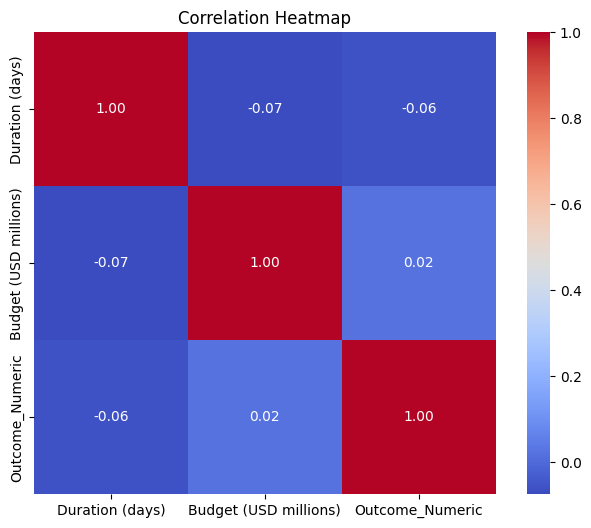

In [63]:
df['Outcome_Numeric'] = df['Outcome'].map({'Success': 1, 'Partial Success': 0.5, 'Failure': 0})

# Correlation matrix
correlation_matrix = df[['Duration (days)', 'Budget (USD millions)', 'Outcome_Numeric']].corr()

# Visualization: Heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()

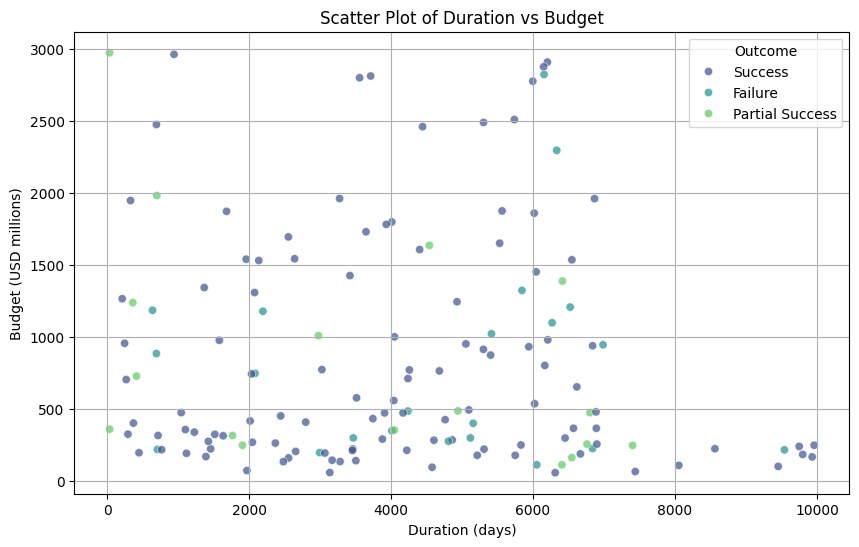

In [65]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Duration (days)', y='Budget (USD millions)', hue='Outcome', palette='viridis', alpha=0.7)
plt.title('Scatter Plot of Duration vs Budget')
plt.xlabel('Duration (days)')
plt.ylabel('Budget (USD millions)')
plt.legend(title='Outcome')
plt.grid()
plt.show()

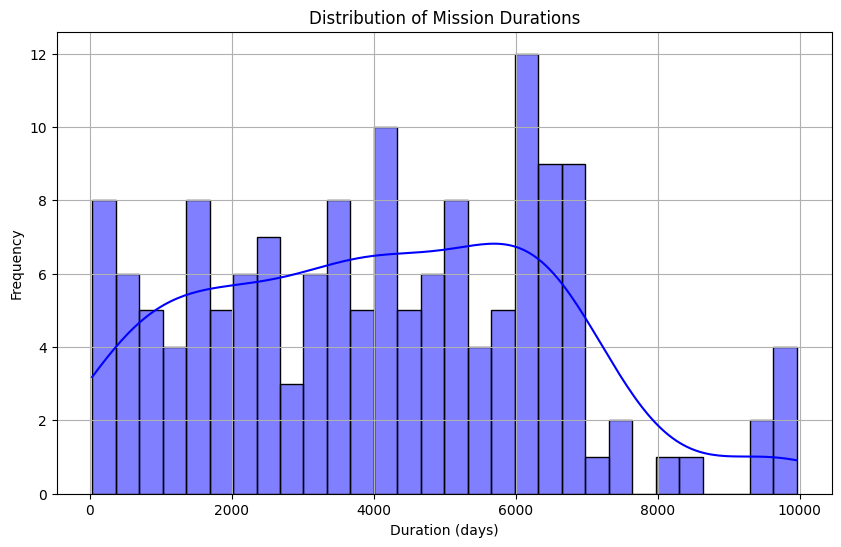

In [66]:
# Visualization: Histogram of Mission Durations
plt.figure(figsize=(10, 6))
sns.histplot(df['Duration (days)'], bins=30, kde=True, color='blue')
plt.title('Distribution of Mission Durations')
plt.xlabel('Duration (days)')
plt.ylabel('Frequency')
plt.grid()
plt.show()

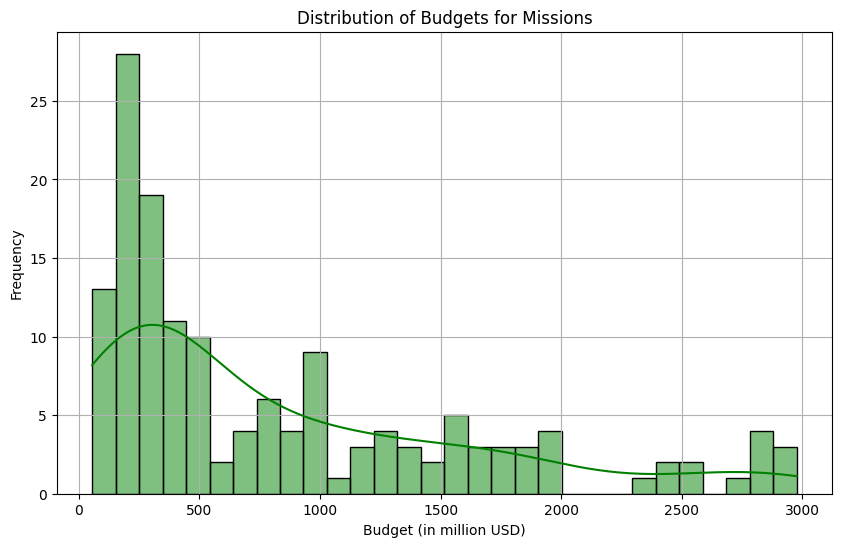

In [69]:
# Visualization: Histogram of Budgets
plt.figure(figsize=(10, 6))
sns.histplot(df['Budget (USD millions)'], bins=30, kde=True, color='green')
plt.title('Distribution of Budgets for Missions')
plt.xlabel('Budget (in million USD)')
plt.ylabel('Frequency')
plt.grid()
plt.show()